In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from os.path import join as oj
from pose_analysis_base import *
from get_pose_mat_wide import get_pose_mat_wide

In [2]:
root_folder = r'/Users/yang/Documents/Wilbrecht_Lab/data4analysis/processed_tracks'
frames_preserved = 32
posemat = PoseMat(root_folder)
combined_df = posemat.get_combined_df()
trial_df = get_pose_mat_wide(combined_df, frames_preserved)
print(trial_df.shape)
print(trial_df.head())

Loading combined DataFrame...
(12275, 72)
           x1          y1          x2          y2          x3          y3  \
0  273.703649  130.625305  274.235963  124.023690  274.606919  117.536312   
1  278.505831  127.307328  278.338044  121.500514  278.484608  115.894415   
2  275.081359  131.457371  276.551920  125.745898  277.920257  119.725813   
3  277.941905  130.312508  278.577533  123.949534  278.881523  117.752173   
4  274.492893  135.458966  273.985886  135.097281  273.146888  134.716506   

           x4          y4          x5          y5  ...         x32  \
0  275.048460  111.118353  276.035795  104.365713  ...  318.327077   
1  278.881790  109.548623  279.126810  102.518210  ...  188.109918   
2  279.353280  113.663796  280.992563  107.857920  ...  305.582506   
3  279.415347  112.051546  280.815795  106.384137  ...  238.016960   
4  271.940633  134.231358  270.906057  133.488431  ...  267.699462   

          y32  sleap_decision  bonsai_decision  straight_walking_speed  \


In [4]:
trial_df.describe([.02, .05, .1, .98])

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x30,y30,x31,y31,x32,y32,straight_walking_speed,trial,restaurant,trial_length
count,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,...,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12275.000000,12260.000000,12275.000000,12275.000000,12275.000000
mean,287.502067,130.918846,287.999321,125.979409,288.486039,120.899168,288.973744,115.611287,289.465164,110.117807,...,296.174431,34.734406,295.197942,34.472819,294.103524,34.243338,163.153230,137.318452,2.481303,140.128717
std,6.942247,3.326941,6.728245,4.399895,6.556192,5.765275,6.396463,7.297901,6.244001,8.919630,...,35.909679,16.268247,38.493255,16.124140,41.065083,16.007816,43.662863,92.583832,1.119271,416.996435
min,256.878612,82.981019,257.245141,83.270098,257.859114,83.391640,258.594272,67.991634,258.652220,53.965762,...,142.255553,4.498509,140.254656,4.506929,138.913316,4.518892,9.083559,1.000000,1.000000,32.000000
2%,273.436496,123.962775,273.836062,116.994964,274.492025,109.318968,274.910662,101.552050,275.443067,93.539954,...,201.280599,16.233931,194.318511,15.989481,187.424148,15.753385,51.936492,5.000000,1.000000,33.000000
5%,275.140444,126.179166,276.739887,119.309992,277.523609,112.213221,278.122998,104.722137,278.609699,97.140041,...,217.763782,17.934657,210.948808,17.459541,204.243105,17.048529,79.966400,13.000000,1.000000,36.000000
10%,278.053951,126.835152,278.656686,120.371652,279.357293,113.783809,280.522446,107.195053,281.354829,99.658237,...,239.290545,20.432929,233.232167,20.002988,226.735832,19.699674,106.774084,25.000000,1.000000,40.000000
50%,287.768790,130.785692,288.167138,125.962651,288.565886,120.390205,289.093858,115.236270,289.945374,109.280594,...,308.880978,32.878551,310.439749,32.913064,311.552957,32.941912,167.137101,125.000000,2.000000,51.000000
98%,299.558706,138.061162,299.510302,135.289263,299.542174,133.729898,299.529533,131.928684,299.569135,130.633377,...,339.556496,96.877753,340.650368,94.943336,342.309113,93.298026,243.964010,358.000000,4.000000,990.600000
max,317.944882,145.923176,318.362645,144.532858,318.493155,143.931406,317.777429,143.785888,316.430994,143.714313,...,355.055492,159.539608,355.027452,159.554088,354.799597,159.568693,297.715676,465.000000,4.000000,12250.000000


count    12260.000000
mean       163.153230
std         43.662863
min          9.083559
2%          51.936492
5%          79.966400
10%        106.774084
25%        138.875177
50%        167.137101
75%        192.273038
95%        228.378211
98%        243.964010
max        297.715676
Name: straight_walking_speed, dtype: float64

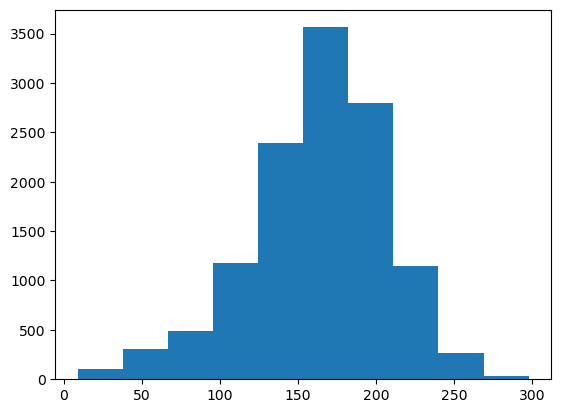

In [7]:
plt.hist(trial_df['straight_walking_speed'])
trial_df['straight_walking_speed'].describe([.02, .05, .1, .25, .5, .75, .95, .98])

In [9]:
ACC_df = trial_df[trial_df['sleap_decision'] == 'ACC']
REJ_df = trial_df[trial_df['sleap_decision'] == 'REJ']
quit_df = trial_df[trial_df['sleap_decision'] == 'quit']

print(ACC_df['trial_length'].describe([.02, .05, .1, .25, .5, .75, .95, .98]))
print(REJ_df['trial_length'].describe([.02, .05, .1, .25, .5, .75, .95, .98]))
print(quit_df['trial_length'].describe([.02, .05, .1, .25, .5, .75, .95, .98]))


count    4994.000000
mean       53.516420
std        21.659127
min        32.000000
2%         41.000000
5%         42.000000
10%        43.000000
25%        46.000000
50%        49.000000
75%        54.000000
95%        74.000000
98%       115.140000
max       534.000000
Name: trial_length, dtype: float64
count     4346.000000
mean       126.167740
std        438.626167
min         32.000000
2%          32.000000
5%          33.000000
10%         35.000000
25%         39.000000
50%         46.000000
75%         61.000000
95%        417.000000
98%        978.000000
max      12250.000000
Name: trial_length, dtype: float64
count    2895.000000
mean      311.614508
std       636.450944
min        36.000000
2%         46.000000
5%         52.000000
10%        59.000000
25%        84.000000
50%       142.000000
75%       253.500000
95%      1040.000000
98%      2159.800000
max      8758.000000
Name: trial_length, dtype: float64


speed > 52
length < 990

In [11]:
filtered_df = trial_df[
    (trial_df['straight_walking_speed'] >= 52) & 
    (trial_df['trial_length'] <= 990)
]
filtered_df.shape

(11782, 72)

In [12]:
filtered_df.to_csv('cleaned_trial_df.csv')